**Ensemble learning** - is used to improve machine learning result by combining multiple models

Bagging vs Boosting

**Bagging Algorithms**

Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.


->Decision Trees

->Random Forest


**Boosting Algorithms**

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions that may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

AdaBoost

XGBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heart_disease.csv")

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.shape

(253680, 22)

In [5]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Feature Selection

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
for i in df.columns:
 print(i)
 print(df[i].unique())
 print()

HeartDiseaseorAttack
[0. 1.]

HighBP
[1. 0.]

HighChol
[1. 0.]

CholCheck
[1. 0.]

BMI
[40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]

Smoker
[1. 0.]

Stroke
[0. 1.]

Diabetes
[0. 2. 1.]

PhysActivity
[0. 1.]

Fruits
[0. 1.]

Veggies
[1. 0.]

HvyAlcoholConsump
[0. 1.]

AnyHealthcare
[1. 0.]

NoDocbcCost
[0. 1.]

GenHlth
[5. 3. 2. 4. 1.]

MentHlth
[18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]

PhysHlth
[15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]

DiffWalk
[1. 0.]

Sex
[0. 1.]

Age
[ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]

E

In [8]:
for i in df.columns:
  df[i]=df[i].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   Diabetes              253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

Correlation graph

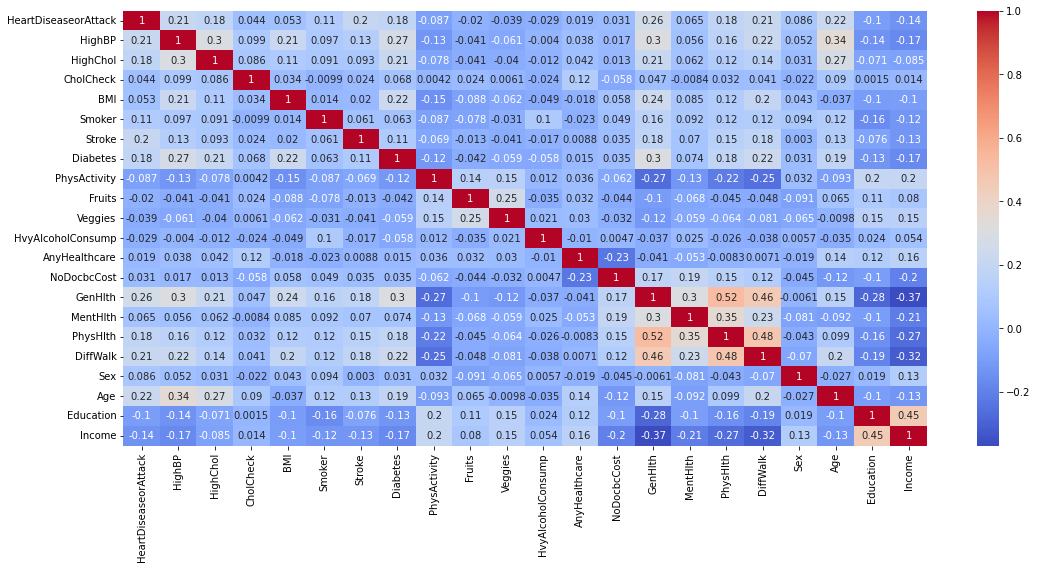

In [10]:
plt.figure(figsize=(18,8))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [11]:
X=df.drop(columns=["HeartDiseaseorAttack"])
y=df["HeartDiseaseorAttack"]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc=StandardScaler()

In [15]:
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [16]:
# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000,random_state=42)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
confusion_matrix(y_pred,y_test)

array([[181829,  17257],
       [  2050,   1808]], dtype=int64)

In [20]:
accuracy_score(y_test,y_pred)

0.9048653815830968

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    183879
           1       0.47      0.09      0.16     19065

    accuracy                           0.90    202944
   macro avg       0.69      0.54      0.55    202944
weighted avg       0.87      0.90      0.88    202944



In [23]:
#Decision Trees

In [25]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [26]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(base_estimator=tree, n_estimators=1000, random_state=42)
bc.fit(x_train,y_train)
y_pred=bc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    183879
           1       0.42      0.14      0.21     19065

    accuracy                           0.90    202944
   macro avg       0.67      0.56      0.58    202944
weighted avg       0.87      0.90      0.88    202944



In [ ]:
accuracy_score(y_test,y_pred)

0.9006326868495743

In [ ]:
# Boosting Algorithms

In [ ]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100)
abc.fit(x_train,y_train)
y_pred=abc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9073488252917061

In [ ]:
# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9045549511195207